In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

Text(0,0.5,'数量(条)')

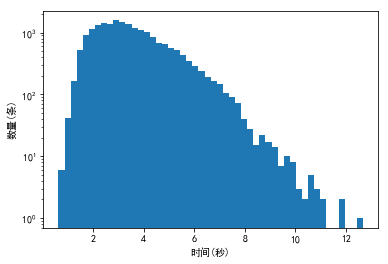

In [11]:
utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/aishell2/spect/test_log/utt2dur'
utt2dur = []
with open(utt2dur_file, 'r') as f:
    for l in f.readlines():
        uid, dur = l.split()
        utt2dur.append([uid, float(dur)])
        

dur = np.array([x[1] for x in utt2dur])
plt.hist(dur, bins=50, log=True)        

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel(u'时间(秒)')
plt.ylabel(u'数量(条)')


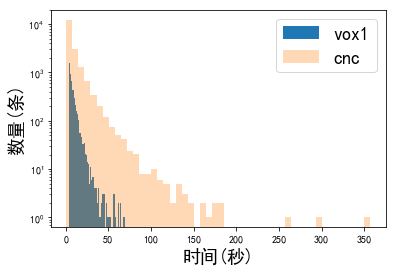

In [19]:
utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/vox1/klfb/test_fb40/utt2dur'
utt2dur = []
with open(utt2dur_file, 'r') as f:
    for l in f.readlines():
        uid, dur = l.split()
        utt2dur.append([uid, float(dur)])
        

dur = np.array([x[1] for x in utt2dur])
plt.hist(dur, bins=50,log=True)        

utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/klfb/test_fb40/utt2dur'
utt2dur = []
with open(utt2dur_file, 'r') as f:
    for l in f.readlines():
        uid, dur = l.split()
        utt2dur.append([uid, float(dur)])
        

dur = np.array([x[1] for x in utt2dur])
plt.hist(dur, bins=50,log=True, alpha=0.3)    

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel(u'时间(秒)', fontsize=18)
plt.ylabel(u'数量(条)', fontsize=18)
plt.legend(['vox1', 'cnc'], fontsize=18)
plt.title

In [1]:
utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/klfb/dev_fb40/utt2dur'
dom2dur = {}
with open(utt2dur_file, 'r') as f:
    for l in f.readlines():
        uid, dur = l.split()
        domain = uid.split('-')[1]
        dur = float(dur)
        if domain not in dom2dur:
            dom2dur[domain] = dur
        else:
            dom2dur[domain] += dur


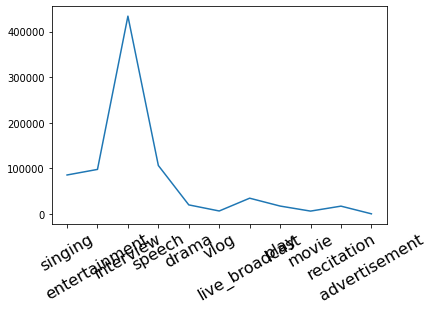

In [11]:
domains = []
durations = []
for d in dom2dur:
    domains.append(d)
    durations.append(dom2dur[d])

plt.plot(durations)
_ = plt.xticks(np.arange(11), domains, size='small',rotation=30, fontsize=16)

In [2]:

all_frames = 0
easy_dom = 0
for dom in dom2dur:
    all_frames += dom2dur[dom]
    if dom in ['recitation', 'live_broadcast', 'speech', 'vlog']:
        easy_dom += dom2dur[dom]
        
print(easy_dom/all_frames)

0.20011082561311117


Text(0,0.5,'数量(条)')

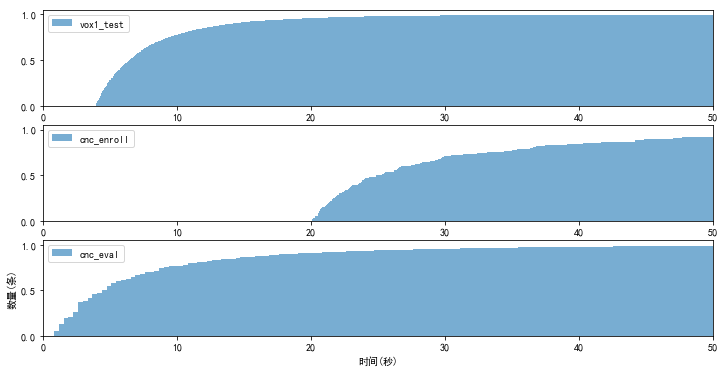

In [26]:
vox1_test_utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/vox1/klfb/test_fb40/utt2dur'
# utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/klfb/test_fb40/utt2dur'
cnc_enroll_utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/enroll/reco2dur'
cnc_eval_utt2dur_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/eval/utt2dur'

utt2dur_files = [vox1_test_utt2dur_file, cnc_enroll_utt2dur_file, cnc_eval_utt2dur_file]
utt2dur_set = ['vox1_test', 'cnc_enroll', 'cnc_eval']

plt.figure(figsize=(12, 6))


for i,utt2dur_file in enumerate(utt2dur_files):
    utt2dur = []
    with open(utt2dur_file, 'r') as f:
        for l in f.readlines():
            uid, dur = l.split()
            utt2dur.append([uid, float(dur)])

    dur = np.array([x[1] for x in utt2dur])
    sup = plt.subplot(len(utt2dur_files),1, i+1)
    sup.hist(dur, bins=1000, cumulative=True, density=True, alpha=0.6) 
    sup.set_xlim(0, 50)
    sup.legend([utt2dur_set[i]])

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel(u'时间(秒)')
plt.ylabel(u'数量(条)')


In [33]:
cnc_test_trials_file = '/home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/klfb/test_fb40/trials'
utt2dur = []
del_utts = set()
min_len=4.0
# max_len=4.0
new_trials = cnc_test_trials_file+'max'+str(min_len)
with open(cnc_eval_utt2dur_file, 'r') as f:
    for l in f.readlines():
        uid, dur = l.split()
        utt2dur.append([uid, float(dur)])
        if float(dur)>=min_len:
            del_utts.add(uid)
        
residual_trials = 0
with open(cnc_test_trials_file, 'r') as f1:
    if os.path.exists(new_trials):
        os.remove(new_trials)
        print('rm %s' % new_trials)
    with open(new_trials, 'w') as f2:
        for l in f1.readlines():
            uid_a, uid_b, dur = l.split()
            
            if uid_b not in del_utts:
                f2.write(l)
                residual_trials += 1
                
print('num of residual_trials is %d' % residual_trials)

rm /home/work2020/yangwenhao/project/lstm_speaker_verification/data/cnceleb/klfb/test_fb40/trialsmax4.0
num of residual_trials is 1668200


(0, 40)

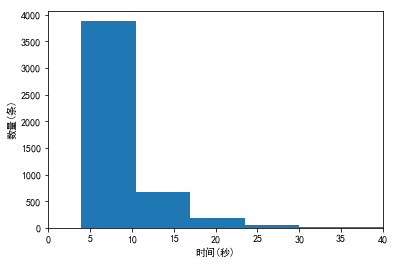

In [9]:
utt2dur_file = '/home/ssd2020/yangwenhao/lstm_speaker_verification/data/vox1/klsp/test/utt2dur'
utt2dur = []
with open(utt2dur_file, 'r') as f:
    for l in f.readlines():
        uid, dur = l.split()
        utt2dur.append([uid, float(dur)])
        
dur = np.array([x[1] for x in utt2dur])
plt.hist(dur)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel(u'时间(秒)')
plt.ylabel(u'数量(条)')
plt.xlim(0, 40)

In [14]:
from matplotlib.font_manager import FontManager
import subprocess

fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)

output = subprocess.check_output(
    'fc-list :lang=zh -f "%{family}\n"', shell=True)
output = output.decode('utf-8')
# print '*' * 10, '系统可用的中文字体', '*' * 10
# print output
zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
available = mat_fonts & zh_fonts

print('*' * 10, '可用的字体', '*' * 10)
for f in available:
    print(f)

********** 可用的字体 **********
LiSu
Droid Sans Fallback
Microsoft YaHei
Yahei Mono
YouYuan
KaiTi
FangSong
SimHei
YaHei Consolas Hybrid


In [13]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/yangwenhao/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'